# Preparation to work with Google Colab

In [2]:
#Mount google drive as your hardisk
from os.path import join
from google.colab import drive

ROOT = "/content/drive"
drive.mount(ROOT)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
PROJECT_PATH = '/content/drive/My Drive/Springboard/Take_home_assignment_1/ultimate_challenge/'

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time
import pickle
import json
import urllib.request

# Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [0]:
# load the login data
FILE = 'logins.json'
with open(PROJECT_PATH +  FILE) as json_file:
    login_dict = json.load(json_file)
    json_file.close()

print(login_dict)

{'login_time': ['1970-01-01 20:13:18', '1970-01-01 20:16:10', '1970-01-01 20:16:37', '1970-01-01 20:16:36', '1970-01-01 20:26:21', '1970-01-01 20:21:41', '1970-01-01 20:12:16', '1970-01-01 20:35:47', '1970-01-01 20:35:38', '1970-01-01 20:47:52', '1970-01-01 20:26:05', '1970-01-01 20:31:03', '1970-01-01 20:34:46', '1970-01-01 20:36:34', '1970-01-01 20:39:25', '1970-01-01 20:40:37', '1970-01-01 20:34:58', '1970-01-01 20:43:59', '1970-01-01 20:47:46', '1970-01-01 20:46:34', '1970-01-01 20:56:07', '1970-01-01 20:49:12', '1970-01-01 20:59:06', '1970-01-01 20:59:59', '1970-01-01 21:15:01', '1970-01-01 21:09:24', '1970-01-01 21:19:24', '1970-01-01 21:20:53', '1970-01-01 21:29:19', '1970-01-01 21:58:05', '1970-01-01 21:51:51', '1970-01-01 21:59:40', '1970-01-01 22:08:34', '1970-01-01 22:02:51', '1970-01-01 21:58:32', '1970-01-01 22:02:31', '1970-01-01 22:05:32', '1970-01-01 22:02:46', '1970-01-01 22:10:28', '1970-01-01 22:11:58', '1970-01-01 22:01:05', '1970-01-01 22:19:10', '1970-01-01 22:16:

In [0]:
login_df = pd.DataFrame(login_dict)

In [0]:
login_df.shape

(93142, 1)

In [0]:
login_df['login_time'] = pd.to_datetime(login_df['login_time'])

In [0]:
login_df.index = login_df['login_time']

In [0]:
login_df_res = login_df.resample('15T').count()

In [0]:
login_df_res.shape

(9788, 1)

In [0]:
login_df_res.head()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [0]:
login_df_res.columns = ['qty']
login_df_res['year'] = login_df_res.index.year
login_df_res['month'] = login_df_res.index.month
login_df_res['day'] = login_df_res.index.day
login_df_res['dayofweek'] = login_df_res.index.strftime('%A')
login_df_res['hour'] = login_df_res.index.hour
login_df_res['minute'] = login_df_res.index.minute

In [0]:
login_df_res.head()

,qty,year,month,day,dayofweek,hour,minute
login_time,,,,,,,
1970-01-01 20:00:00,2,1970,1,1,Thursday,20,0
1970-01-01 20:15:00,6,1970,1,1,Thursday,20,15
1970-01-01 20:30:00,9,1970,1,1,Thursday,20,30
1970-01-01 20:45:00,7,1970,1,1,Thursday,20,45
1970-01-01 21:00:00,1,1970,1,1,Thursday,21,0


In [0]:
login_df_res.qty.sum()

93142

In [0]:
login_df_res.describe().T

,count,mean,std,min,25%,50%,75%,max
qty,9788.0,9.515938,8.328818,0.0,3.00,7.0,13.00,73.0
year,9788.0,1970.000000,0.000000,1970.0,1970.00,1970.0,1970.00,1970.0
month,9788.0,2.259093,1.017219,1.0,1.00,2.0,3.00,4.0
day,9788.0,14.569268,8.683342,1.0,7.00,14.0,22.00,31.0
hour,9788.0,11.496935,6.922294,0.0,5.00,11.0,17.00,23.0
minute,9788.0,22.500000,16.771367,0.0,11.25,22.5,33.75,45.0


In [0]:
login_df_res.loc[login_df_res.qty == 73]

,qty,year,month,day,dayofweek,hour,minute
login_time,,,,,,,
1970-03-01 04:30:00,73,1970,3,1,Sunday,4,30


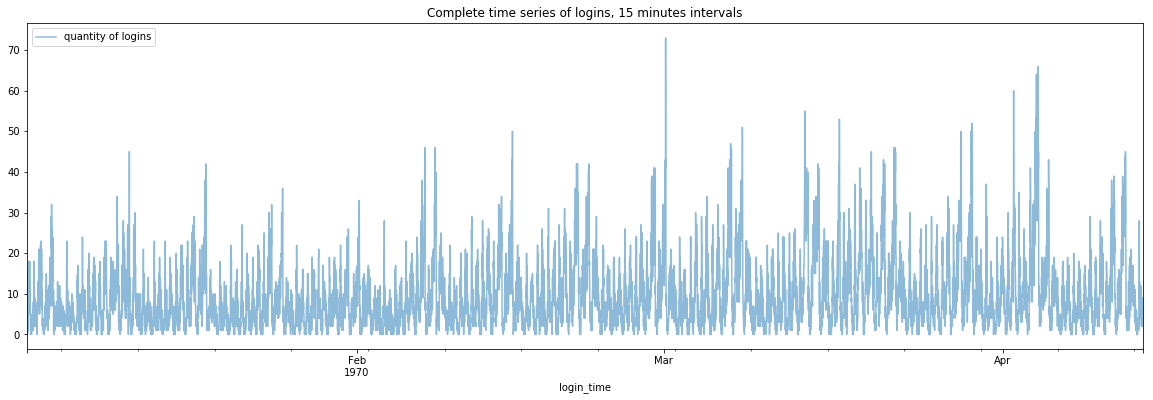

In [0]:
login_df_res['qty'].plot(alpha=0.5, 
                         style='-',
                         figsize = (20,6))
plt.legend(['quantity of logins'],
           loc='upper left')
plt.title('Complete time series of logins, 15 minutes intervals')
plt.show()

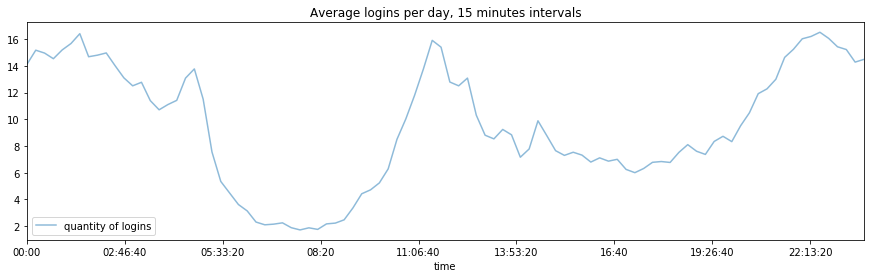

In [0]:
# overall day pattern
login_df_res.groupby(login_df_res.index.time)['qty'].mean().plot(alpha=0.5, 
                                              style='-',
                                              figsize = (15,4))
plt.legend(['quantity of logins'],
           loc = 'best')
plt.title('Average logins per day, 15 minutes intervals')
plt.show()

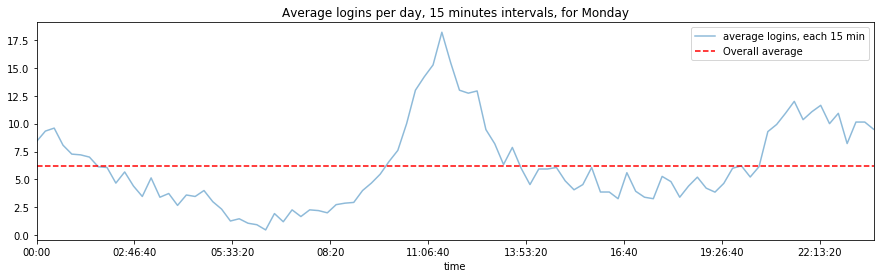

Oveall average: 6.21


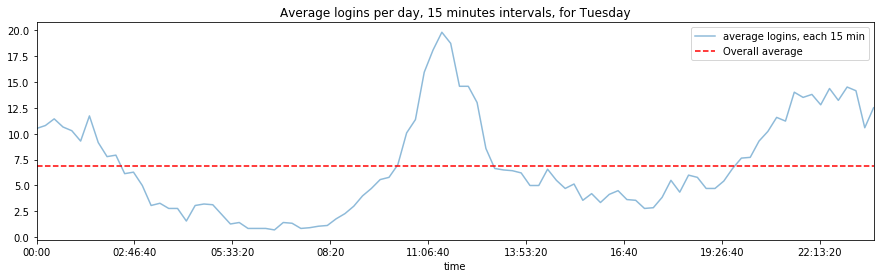

Oveall average: 6.90


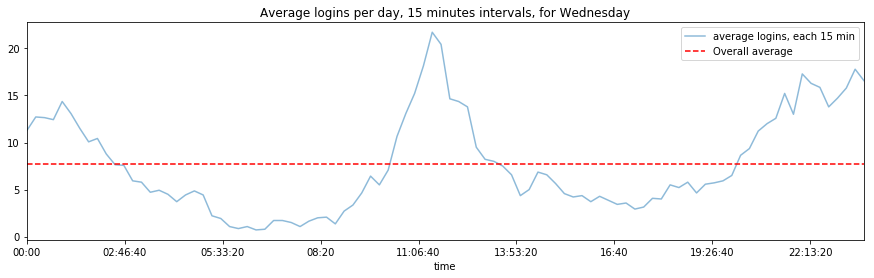

Oveall average: 7.69


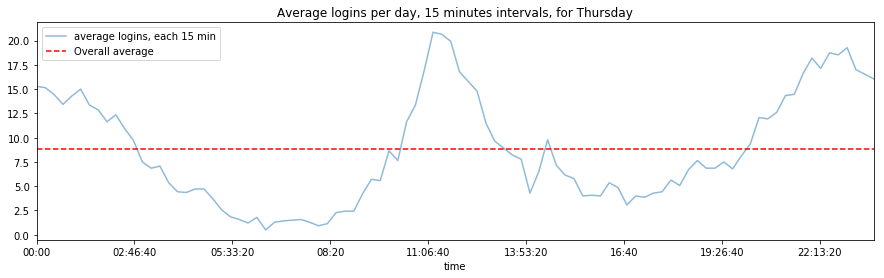

Oveall average: 8.79


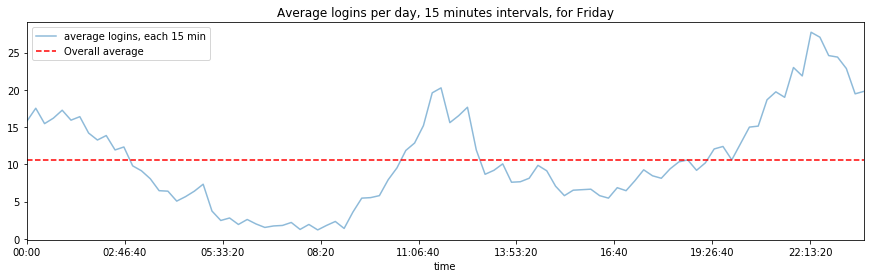

Oveall average: 10.56


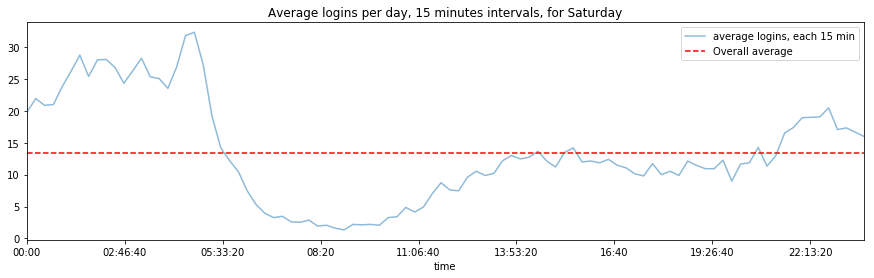

Oveall average: 13.46


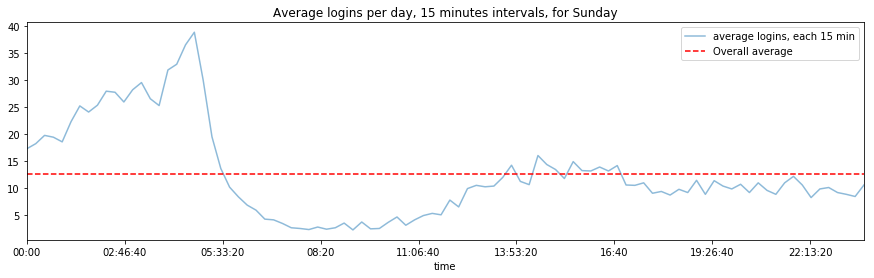

Oveall average: 12.62


In [0]:
days_of_week = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
for d in days_of_week:
    day_of_week = login_df_res.loc[login_df_res.dayofweek == d, 'qty']
    day_of_week.groupby(day_of_week.index.time).mean().plot(alpha=0.5, 
                                                  style='-',
                                                  figsize = (15,4),
                                                  label = 'average logins, each 15 min')
    plt.axhline(y=day_of_week.mean(), color='r', linestyle='--', label = 'Overall average')
    plt.legend(loc = 'best')
    plt.title('Average logins per day, 15 minutes intervals, for {}'.format(d))
    plt.show()
    print('Oveall average: {:.2f}'.format(day_of_week.mean()))

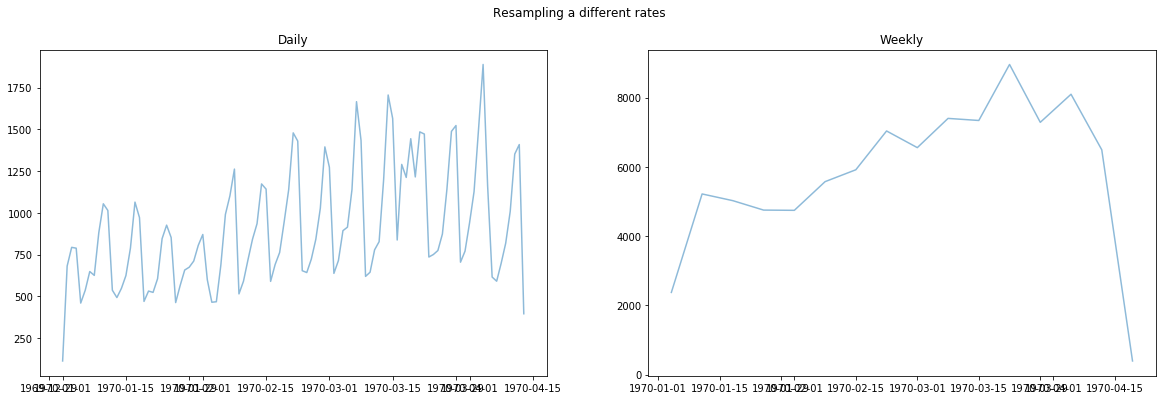

In [0]:
daily = login_df_res['qty'].resample('D').sum()
weekly = login_df_res['qty'].resample('W').sum()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))
fig.suptitle('Resampling a different rates')
ax1.plot(daily, alpha=0.5 )
ax2.plot(weekly, alpha=0.5)
ax1.set_title('Daily');
ax2.set_title('Weekly');
plt.show()

### Part 1: Summary of conclusions from exploratory analysis

1. Login data ranges from Jan, 1st, 1970 up to Apr, 15th, 1970
2. The year 1970, probably is wrong, or was disguised, because this time of service did not exist in 1970
3. The average number of logins in a 15 interval is 9.51
4. The maximum number of logins registered was 73, which happend on March, 01st at 4. 04:30, a Sunday
5. Weekdays from Monday to Friday, have averge logins per 15 minutes ranging from 6 to 10, while during weekends this average goes up from 12 to 13
6. Peek hours during weekdays happens near midday and also from 8 to 11 p.m., while during weekends the busy hours are late night (after 0 a.m. up to 4 a.m.)
7. We verified more activity during March and April compared to January and February


